# Notebook de Análise da Qualidade de vinho

O ojetivo deste código de Machine Learning é desenvolver uma predição da qualidade do vinho produzido. Onde a qualidade do vinho terá como saída números interiros.

#0) Importação de Bibliotecas

###O início do código é a importação das bibliotecas a serem utilizadas.



Numpy para realizar as operações matemáticas.
Pandas para manipular dados. Aqui é utilizada para obter os dados da url.
Sklearn para o Machine Learning.
Warnings para ignorar os warnings.

In [ ]:
# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Imports necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from pickle import dump
from pickle import load

# 1) Carga do Dataset

Os dados são obtidos a partir da url.


---

Variáveis de entrada:
*   1 - fixed acidity (>=0)
*   2 - volatile acidity (>=0)
*   3 - citric acid (>=0)
*   4 - residual sugar (>=0)
*   5 - chlorides (>=0)
*   6 - free sulfur dioxide (>=0)
*   7 - total sulfur dioxide (>=0)
*   8 - density (>0)
*   9 - pH (<=14 e >=0)
*   10 - sulphates (>=0)
*   11 - alcohol (>=0)


---


Variável de saída :
*   12 - quality (int 0 a 10)

In [ ]:
# url a importar
url = 'https://raw.githubusercontent.com/Mavischief/Wine_Quality_ML/main/winequality-white.csv'

# Lê o arquivo
dataset = pd.read_csv(url, delimiter=';')

# exibe as 5 primeiras linhas
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


# 2) Separação do conjunto de treino e do conjunto de teste com holdout

Aqui é definido o tamanho do conjunto de treino, do conjunto de teste, as partições e o metodo de avaliação.

In [ ]:
test_size = 0.20 # tamanho do conjunto de teste
seed = 7 # semente aleatória

# Separação em conjuntos de treino e teste
array = dataset.values
X = array[:,0:11]
y = array[:,11]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, shuffle=True, random_state=seed, stratify=y) # holdout com estratificação

# Parâmetros e partições da validação cruzada
scoring = 'accuracy'
num_particoes = 10
kfold = StratifiedKFold(n_splits=num_particoes, shuffle=True, random_state=seed) # validação cruzada com estratificação

# 3) Modelagem e Inferência

São utilizados 4 algoritimos para classificação. KNN, SVM, Naïve Bayes e Árvore de Decisão. Os dados são treinados com cada algoritmo e no final é apresentadado a acurácia encontrada.

KNN: 0.478053 (0.025727)
CART: 0.587054 (0.024745)
NB: 0.437213 (0.020639)
SVM: 0.448697 (0.003571)


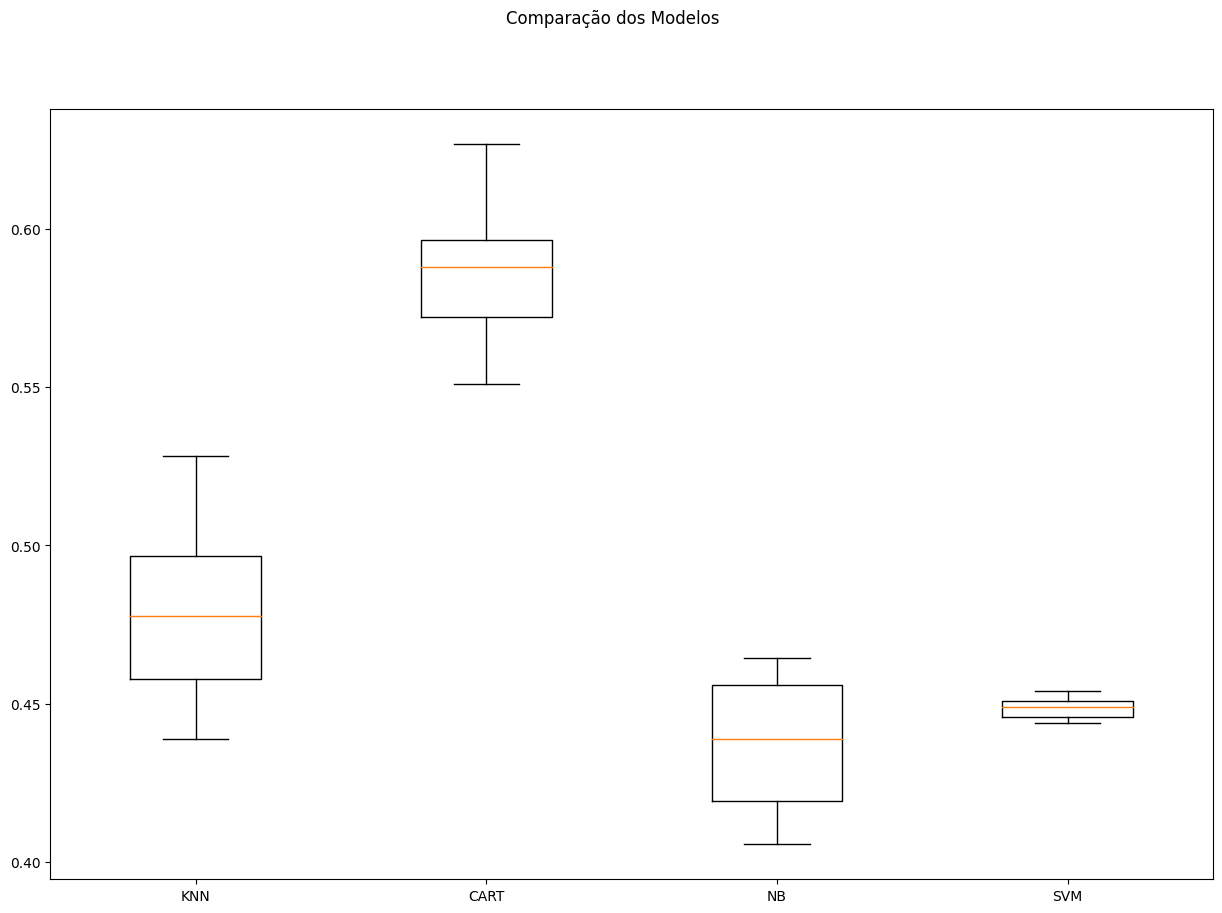

In [ ]:
np.random.seed(7) # definindo uma semente global

# Lista que armazenará os modelos
models = []

# Criando os modelos e adicionando-os na lista de modelos
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Listas para armazenar os resultados
results = []
names = []

# Avaliação dos modelos
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(15,10))
fig.suptitle('Comparação dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# 4) Criação e avaliação de modelos: dados padronizados e normalizados

###Os mesmos dados são treinados novamente, mas, desta vez, também é treinado com os dados normalizados (os valores do dataset são adaptados para ficar entre 0 e 1) e padronizados (os valores do dataset são adaptaos para terem média 0 e desvio padrão 1) para ver se são obtidos resultados melhores.

KNN-orig: 0.478 (0.026)
CART-orig: 0.587 (0.025)
NB-orig: 0.437 (0.021)
SVM-orig: 0.449 (0.004)
KNN-padr: 0.546 (0.020)
CART-padr: 0.579 (0.027)
NB-padr: 0.437 (0.022)
SVM-padr: 0.565 (0.024)
KNN-norm: 0.559 (0.025)
CART-norm: 0.584 (0.028)
NB-norm: 0.437 (0.022)
SVM-norm: 0.552 (0.029)


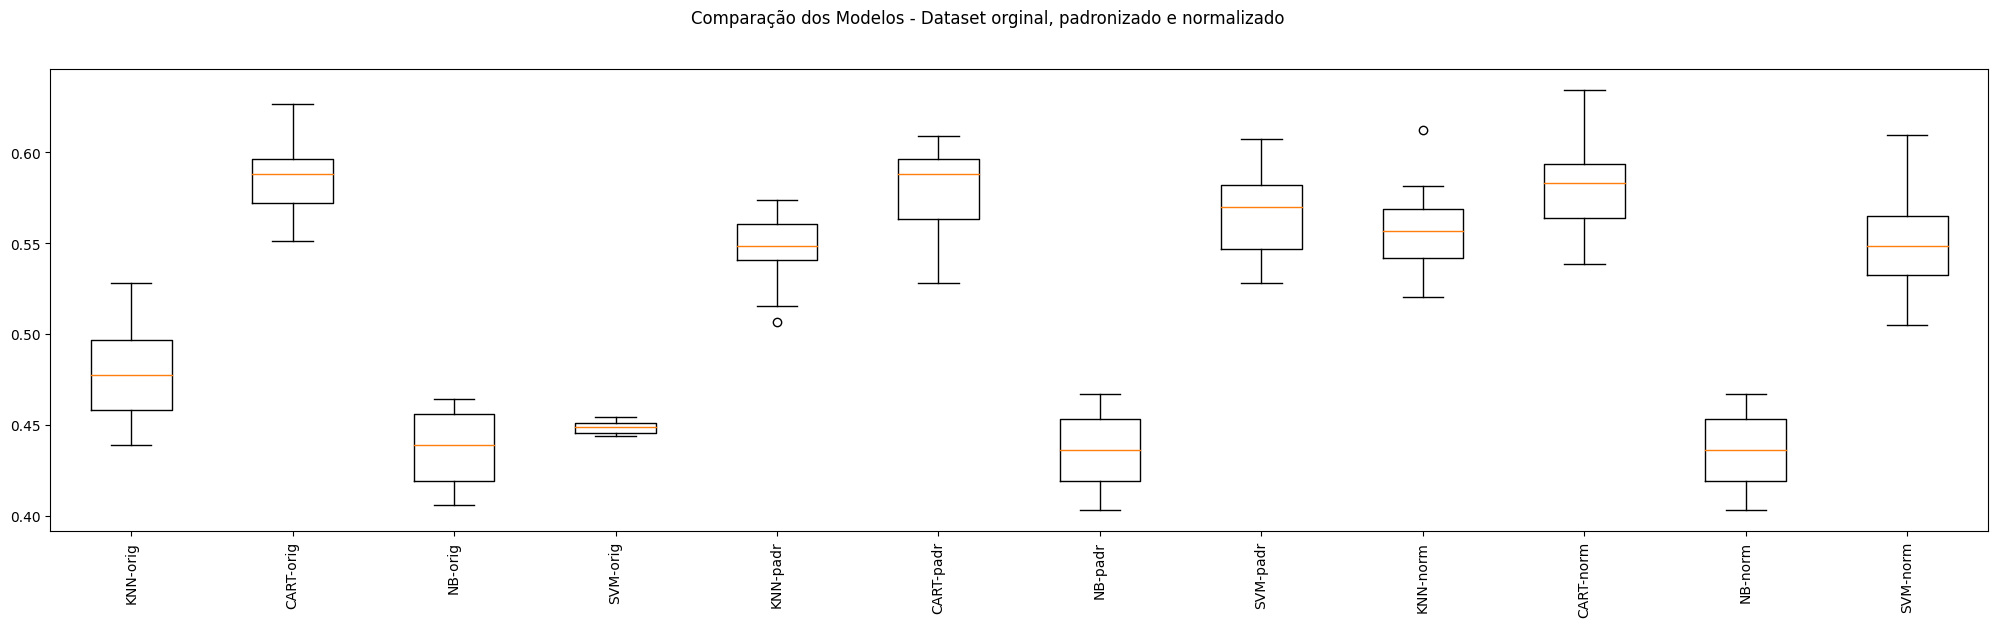

In [ ]:
np.random.seed(7) # definindo uma semente global para este bloco

# Listas para armazenar os armazenar os pipelines e os resultados para todas as visões do dataset
pipelines = []
results = []
names = []


# Criando os elementos do pipeline

# Algoritmos que serão utilizados
knn = ('KNN', KNeighborsClassifier())
cart = ('CART', DecisionTreeClassifier())
naive_bayes = ('NB', GaussianNB())
svm = ('SVM', SVC())

# Transformações que serão utilizadas
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())


# Montando os pipelines

# Dataset original
pipelines.append(('KNN-orig', Pipeline([knn])))
pipelines.append(('CART-orig', Pipeline([cart])))
pipelines.append(('NB-orig', Pipeline([naive_bayes])))
pipelines.append(('SVM-orig', Pipeline([svm])))

# Dataset Padronizado
pipelines.append(('KNN-padr', Pipeline([standard_scaler, knn])))
pipelines.append(('CART-padr', Pipeline([standard_scaler, cart])))
pipelines.append(('NB-padr', Pipeline([standard_scaler, naive_bayes])))
pipelines.append(('SVM-padr', Pipeline([standard_scaler, svm])))

# Dataset Normalizado
pipelines.append(('KNN-norm', Pipeline([min_max_scaler, knn])))
pipelines.append(('CART-norm', Pipeline([min_max_scaler, cart])))
pipelines.append(('NB-norm', Pipeline([min_max_scaler, naive_bayes])))
pipelines.append(('SVM-norm', Pipeline([min_max_scaler, svm])))

# Executando os pipelines
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std()) # formatando para 3 casas decimais
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(25,6))
fig.suptitle('Comparação dos Modelos - Dataset orginal, padronizado e normalizado')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
plt.show()

# 5) Otimização dos hiperparâmetros

Como apenas o método Naïve Bayes obteve os piores resultados ele foi descartado. A partir dos melhores resultados, são realizados mudanças nos hiperparâmetros para melhorar os resultados obtidos.


---

O melhor resultado encontrado foi knn-padr ('KNN__metric': 'manhattan', 'KNN__n_neighbors': 1)

In [ ]:
# Tuning do KNN, Decision Tree Classifier e SVM

np.random.seed(7) # definindo uma semente global para este bloco

pipelines = []

# Definindo os componentes do pipeline
knn = ('KNN', KNeighborsClassifier())
cart = ('CART', DecisionTreeClassifier())
svm = ('SVM', SVC())

# Transformações que serão utilizadas
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

param_grid = {
    'KNN__n_neighbors': [1,3,5,7,9,11,13,15,17,19],
    'KNN__metric': ["euclidean", "manhattan", "minkowski"],
}

# Montando os pipelines KNN
pipelines.append(('knn-orig', Pipeline(steps=[knn]), param_grid))
pipelines.append(('knn-padr', Pipeline(steps=[standard_scaler, knn]), param_grid))
pipelines.append(('knn-norm', Pipeline(steps=[min_max_scaler, knn]), param_grid))

param_grid = {
    'CART__max_depth': [None, 5, 10, 20, 30],
    'CART__criterion': ["gini", "entropy"],
}

# Montando os pipelines DecisionTreeClassifier
pipelines.append(('CART-orig', Pipeline(steps=[cart]), param_grid))
pipelines.append(('CART-padr', Pipeline(steps=[standard_scaler, cart]), param_grid))
pipelines.append(('CART-norm', Pipeline(steps=[min_max_scaler, cart]), param_grid))

param_grid = {
    'SVM__C': [1, 10, 100],
    'SVM__kernel': ["rbf"],
    'SVM__gamma': ["scale"],
}

# Montando os pipelines KSVM
pipelines.append(('SVM-orig', Pipeline(steps=[svm]), param_grid))
pipelines.append(('SVM-padr', Pipeline(steps=[standard_scaler, svm]), param_grid))
pipelines.append(('SVM-norm', Pipeline(steps=[min_max_scaler, svm]), param_grid))

# Prepara e executa o GridSearchCV
for name, model, param_grid in pipelines:
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
    grid.fit(X_train, y_train)
    # imprime a melhor configuração
    print("Resultado: %s - Melhor: %f usando %s" % (name, grid.best_score_, grid.best_params_))

Resultado: knn-orig - Melhor: 0.574288 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 1}
Resultado: knn-padr - Melhor: 0.626099 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 1}
Resultado: knn-norm - Melhor: 0.624053 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 1}
Resultado: CART-orig - Melhor: 0.587054 usando {'CART__criterion': 'gini', 'CART__max_depth': None}
Resultado: CART-padr - Melhor: 0.582956 usando {'CART__criterion': 'entropy', 'CART__max_depth': 20}
Resultado: CART-norm - Melhor: 0.580927 usando {'CART__criterion': 'gini', 'CART__max_depth': None}
Resultado: SVM-orig - Melhor: 0.510973 usando {'SVM__C': 100, 'SVM__gamma': 'scale', 'SVM__kernel': 'rbf'}
Resultado: SVM-padr - Melhor: 0.584738 usando {'SVM__C': 100, 'SVM__gamma': 'scale', 'SVM__kernel': 'rbf'}
Resultado: SVM-norm - Melhor: 0.564570 usando {'SVM__C': 100, 'SVM__gamma': 'scale', 'SVM__kernel': 'rbf'}


# 6) Finalização do Modelo
Modelo é finalizado com o algoritmo e parametros que apresentaram a melhor acurácia. Para finalizar, o modelo é treinado utilizando todo o conjunto de dados de treinamento.

In [ ]:
# Avaliação do modelo com o conjunto de testes

# Preparação do modelo
scaler = StandardScaler().fit(X_train) # ajuste do scaler com o conjunto de treino
rescaledX = scaler.transform(X_train) # aplicação da scale no conjunto de treino
model = KNeighborsClassifier(metric='manhattan', n_neighbors=1)
model.fit(rescaledX, y_train)

# Estimativa da acurácia no conjunto de teste
rescaledTestX = scaler.transform(X_test) # aplicação do scaler no conjunto de teste
predictions = model.predict(rescaledTestX)
print(accuracy_score(y_test, predictions))

0.6489795918367347


In [ ]:
# Preparação do modelo com TODO o dataset
scaler = StandardScaler().fit(X) # ajuste do scaler com TODO o dataset
rescaledX = scaler.transform(X) # aplicação em TODO o dataset
model.fit(rescaledX, y)

KNeighborsClassifier(metric='manhattan', n_neighbors=1)

Rodando o modelo a partir de um pipeline com os hiperparâmetros otimizados

In [ ]:
np.random.seed(7)

model = KNeighborsClassifier(metric='manhattan', n_neighbors=1)

pipeline = Pipeline(steps=[('StandardScaler', StandardScaler()), ('knn', model)])

pipeline.fit(X_train, y_train)
predictions = pipeline.predict(X_test)
print(accuracy_score(y_test, predictions))

0.6489795918367347


# 7) Simulando a aplicação do modelo em dados não vistos

O modelo desenvolvido tem a melhor acurácia de apresentar a previsão da qualidade do vinho. O modelo pode simular a entrada de novos dados para prever a saída.

In [ ]:
# Novos dados - não sabemos a classe!
data = {'fixed acidity': [0.4, 0.5, 1],
        'volatile acidity': [0.90, 0.800, 0.710],
        'citric acid': [0.1, 0, 0],
        'residual sugar': [2, 4, 2],
        'chlorides': [0.035, 0.06, 0.07],
        'free sulfur dioxide': [10, 20, 10],
        'total sulfur dioxide': [50, 60, 100],
        'density': [0.996, 0.996, 0.996],
        'pH': [4.15, 3, 3.1],
        'sulphates': [0.6, 0.7, 0.1],
        'alcohol': [13, 10, 2],
        }

atributos = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density','pH', 'sulphates', 'alcohol']
entrada = pd.DataFrame(data, columns=atributos)

array_entrada = entrada.values
X_entrada = array_entrada[:,0:11].astype(float)

# Aplicação do scaler utilizado em X
rescaledEntradaX = scaler.transform(X_entrada)

# Predição de classes dos dados de entrada
saidas = model.predict(rescaledEntradaX)
print(saidas)

[4. 5. 4.]


Deve-se ficar atento que ao desenvolver um código para realizar a predição o tempo dos testes do código e da otimização dos hiperparâmetros devem ser levado em conta, pois podem tomar bastante tempo.

# 8) Salva o modelo treinado em um arquivo

O modelo é salvo em um arquivo pkl.

In [ ]:
# Salva o modelo
filename_modelo = 'model.pkl'
dump(model, open(filename_modelo, 'wb'))

# Salva o scaler
filename_scaler = 'scaler.pkl'
dump(scaler, open(filename_scaler, 'wb'))

# Salvando X_test e y_test
X_test_df = pd.DataFrame(X_test, columns=dataset.columns[:-1])
y_test_df = pd.DataFrame(y_test, columns=[dataset.columns[-1]])
X_test_df.to_csv("X_test_dataset_vinho.csv", encoding='utf-8', index=False)
y_test_df.to_csv("y_test_dataset_vinho.csv", encoding='utf-8', index=False)
